In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import gdown

# File ID from the Google Drive link
file_id = '1-VfCsodMGFoJRJmJI1ohw4t6MBRlzA6m'
# URL to download
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file to a specific path
output_path = '/content/your_file.zip'
gdown.download(url, output_path, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1-VfCsodMGFoJRJmJI1ohw4t6MBRlzA6m
From (redirected): https://drive.google.com/uc?id=1-VfCsodMGFoJRJmJI1ohw4t6MBRlzA6m&confirm=t&uuid=511ecd8f-0912-42b9-8bac-6f6de83761b4
To: /content/your_file.zip
100%|██████████| 319M/319M [00:02<00:00, 136MB/s]


'/content/your_file.zip'

In [3]:
import zipfile

# Path to the ZIP file
zip_path = '/content/your_file.zip'
# Folder to extract the contents
extract_path = '/content/extracted_folder'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted successfully!")


Files extracted successfully!


In [4]:
import pandas as pd
pd.read_csv("/content/extracted_folder/driving_log.csv").head()

C:\Users\91920\car data\IMG\center_2024_07_19_02_01_28_499.jpg  \
0  C:\Users\91920\car data\IMG\center_2024_07_19_...               
1  C:\Users\91920\car data\IMG\center_2024_07_19_...               
2  C:\Users\91920\car data\IMG\center_2024_07_19_...               
3  C:\Users\91920\car data\IMG\center_2024_07_19_...               
4  C:\Users\91920\car data\IMG\center_2024_07_19_...               

  C:\Users\91920\car data\IMG\left_2024_07_19_02_01_28_499.jpg  \
0  C:\Users\91920\car data\IMG\left_2024_07_19_02...             
1  C:\Users\91920\car data\IMG\left_2024_07_19_02...             
2  C:\Users\91920\car data\IMG\left_2024_07_19_02...             
3  C:\Users\91920\car data\IMG\left_2024_07_19_02...             
4  C:\Users\91920\car data\IMG\left_2024_07_19_02...             

  C:\Users\91920\car data\IMG\right_2024_07_19_02_01_28_499.jpg  -0.3  \
0  C:\Users\91920\car data\IMG\right_2024_07_19_0...             -0.5   
1  C:\Users\91920\car data\IMG\right_2024_07_19_0...              0.0   
2  C:\Users\91920\car data\IMG\right_2024_07_19_0...              0.0   
3  C:\Users\91920\car data\IMG\right_2024_07_19_0...              0.0   
4  C:\Users\91920\car data\IMG\right_2024_07_19_0...              0.0   

   0.3515136  0     13.42  
0   0.587964  0  13.70049  
1   0.761710  0  14.34658  
2   1.000000  0  14.99776  
3   1.000000  0  15.73758  
4   1.000000  0  16.57924

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Flatten,Dense,Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import random
import ntpath
import pandas as pd


In [6]:
data_f = "extracted_folder"
columns = ["center", "left", "right", "steering", "throttle", "reverse", "speed"]
data = pd.read_csv(os.path.join(data_f, "driving_log.csv"), names=columns)
pd.set_option('display.max_colwidth', None)
data.head()

center  \
0  C:\Users\91920\car data\IMG\center_2024_07_19_02_01_28_499.jpg   
1  C:\Users\91920\car data\IMG\center_2024_07_19_02_01_28_571.jpg   
2  C:\Users\91920\car data\IMG\center_2024_07_19_02_01_28_643.jpg   
3  C:\Users\91920\car data\IMG\center_2024_07_19_02_01_28_715.jpg   
4  C:\Users\91920\car data\IMG\center_2024_07_19_02_01_28_783.jpg   

                                                           left  \
0  C:\Users\91920\car data\IMG\left_2024_07_19_02_01_28_499.jpg   
1  C:\Users\91920\car data\IMG\left_2024_07_19_02_01_28_571.jpg   
2  C:\Users\91920\car data\IMG\left_2024_07_19_02_01_28_643.jpg   
3  C:\Users\91920\car data\IMG\left_2024_07_19_02_01_28_715.jpg   
4  C:\Users\91920\car data\IMG\left_2024_07_19_02_01_28_783.jpg   

                                                           right  steering  \
0  C:\Users\91920\car data\IMG\right_2024_07_19_02_01_28_499.jpg      -0.3   
1  C:\Users\91920\car data\IMG\right_2024_07_19_02_01_28_571.jpg      -0.5   
2  C:\Users\91920\car data\IMG\right_2024_07_19_02_01_28_643.jpg       0.0   
3  C:\Users\91920\car data\IMG\right_2024_07_19_02_01_28_715.jpg       0.0   
4  C:\Users\91920\car data\IMG\right_2024_07_19_02_01_28_783.jpg       0.0   

   throttle  reverse     speed  
0  0.351514        0  13.42000  
1  0.587964        0  13.70049  
2  0.761710        0  14.34658  
3  1.000000        0  14.99776  
4  1.000000        0  15.73758

We can see we have this much extra in path - "	C:\Users\91920\car data\IMG\" so we will crop it

In [7]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data["center"] = data["center"].apply(path_leaf)
data["left"] = data["left"].apply(path_leaf)
data["right"] = data["right"].apply(path_leaf)
data.head()

center                              left  \
0  center_2024_07_19_02_01_28_499.jpg  left_2024_07_19_02_01_28_499.jpg   
1  center_2024_07_19_02_01_28_571.jpg  left_2024_07_19_02_01_28_571.jpg   
2  center_2024_07_19_02_01_28_643.jpg  left_2024_07_19_02_01_28_643.jpg   
3  center_2024_07_19_02_01_28_715.jpg  left_2024_07_19_02_01_28_715.jpg   
4  center_2024_07_19_02_01_28_783.jpg  left_2024_07_19_02_01_28_783.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2024_07_19_02_01_28_499.jpg      -0.3  0.351514        0  13.42000  
1  right_2024_07_19_02_01_28_571.jpg      -0.5  0.587964        0  13.70049  
2  right_2024_07_19_02_01_28_643.jpg       0.0  0.761710        0  14.34658  
3  right_2024_07_19_02_01_28_715.jpg       0.0  1.000000        0  14.99776  
4  right_2024_07_19_02_01_28_783.jpg       0.0  1.000000        0  15.73758

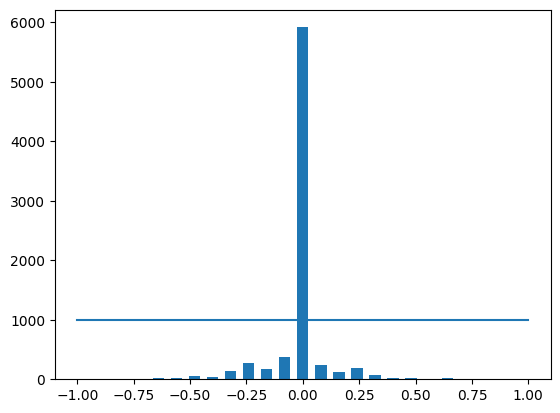

In [8]:
num_bins = 25
samples_per_bin = 1000
hist, bins = np.histogram(data["steering"], num_bins)
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data["steering"]), np.max(data["steering"])), (samples_per_bin, samples_per_bin))

Unbalanced data we need to remove extra zeros

1.   List item
2.   List item



In [9]:
len(data)

7769

In [10]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data["steering"])):
        if data["steering"][i] >= bins[j] and data["steering"].iloc[i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_  = list_[samples_per_bin:]
    remove_list.extend(list_)

In [11]:
print("removed: ", len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print("remaining: ", len(data))

removed:  4916
remaining:  2853


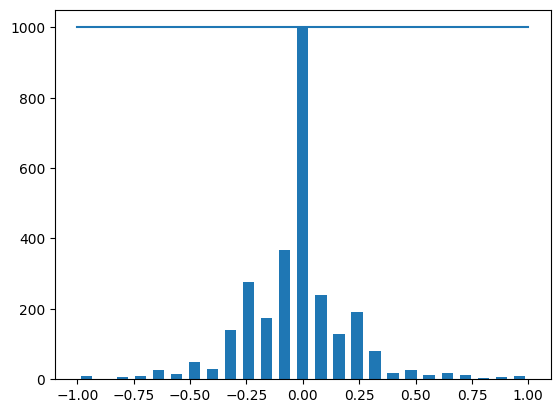

In [12]:
hist, _ = np.histogram(data["steering"], num_bins)  # Fixed typo: np.histogram
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data["steering"]), np.max(data["steering"])), (samples_per_bin, samples_per_bin))


In [13]:
def load_img_steering(data_f ,df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center = indexed_data[0]
    left = indexed_data[1]
    right = indexed_data[2]
    image_path.append(os.path.join(data_f, center.strip()))
    steering.append(float(indexed_data[3]))

    #left image
    image_path.append(os.path.join(data_f, left.strip()))
    steering.append(float(indexed_data[3]) + 0.15)

    #right
    image_path.append(os.path.join(data_f, right.strip()))
    steering.append(float(indexed_data[3]) - 0.15)

  image_paths = np.asarray(image_path)
  steering = np.asarray(steering)
  return image_paths, steering

In [14]:
image_paths , steerings = load_img_steering(data_f+"/IMG",data)
image_paths

array(['extracted_folder/IMG/center_2024_07_19_02_01_28_499.jpg',
       'extracted_folder/IMG/left_2024_07_19_02_01_28_499.jpg',
       'extracted_folder/IMG/right_2024_07_19_02_01_28_499.jpg', ...,
       'extracted_folder/IMG/center_2024_07_19_02_18_29_503.jpg',
       'extracted_folder/IMG/left_2024_07_19_02_18_29_503.jpg',
       'extracted_folder/IMG/right_2024_07_19_02_18_29_503.jpg'],
      dtype='<U55')

In [15]:
len(steerings)

8559

In [16]:
X_train, X_val, Y_train, Y_val = train_test_split(image_paths, steerings, test_size=0.2, random_state=14)
print("Training Samples: {}\nvalid Samples:{}".format(len(X_train), len(X_val)))

Training Samples: 6847
valid Samples:1712


Text(0.5, 1.0, 'Validation set')

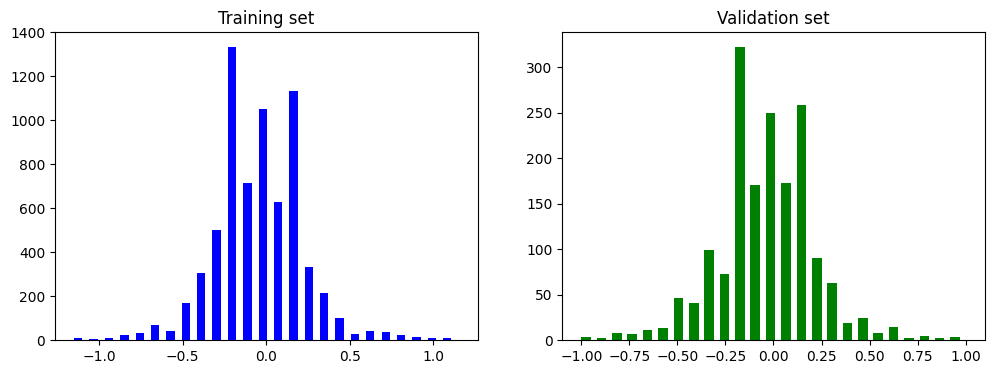

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(Y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(Y_val, bins=num_bins, width=0.05, color='green')
axes[1].set_title('Validation set')

Data Augmentation

Text(0.5, 1.0, 'Zoomed Image')

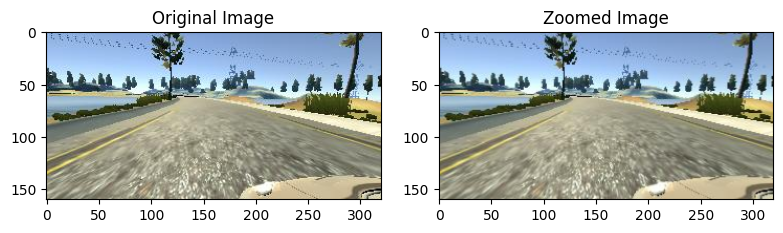

In [18]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.2))
  image = zoom.augment_image(image)
  return image

image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
f.tight_layout()
ax1.imshow(original_image)
ax1.set_title('Original Image')
ax2.imshow(zoomed_image)
ax2.set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

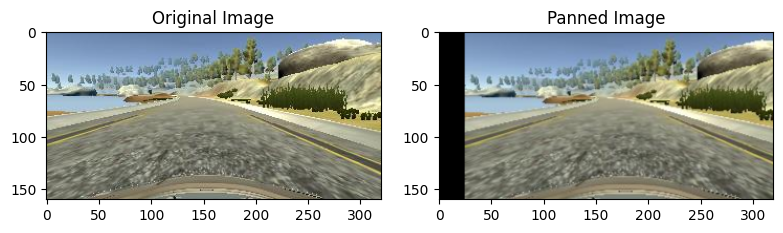

In [19]:
def pan(image):
  pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
pan_image = pan(original_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
f.tight_layout()
ax1.imshow(original_image)
ax1.set_title('Original Image')
ax2.imshow(pan_image)
ax2.set_title('Panned Image')

Text(0.5, 1.0, 'Bright Image')

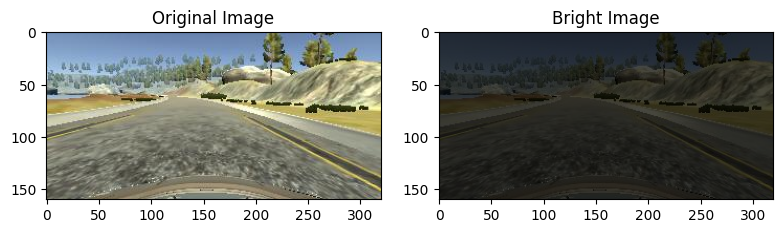

In [20]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
bright_image = img_random_brightness(original_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
f.tight_layout()
ax1.imshow(original_image)
ax1.set_title('Original Image')
ax2.imshow(bright_image)
ax2.set_title('Bright Image')

Text(0.5, 1.0, 'Flipped Image')

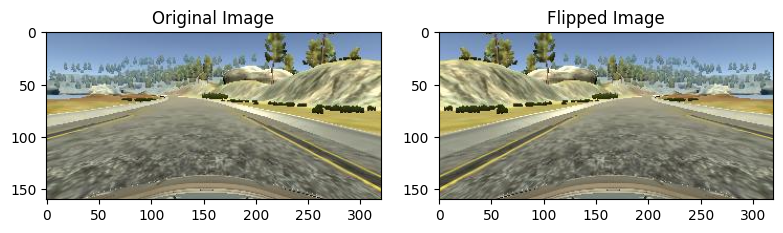

In [21]:
def img_flip(image, steering_angle):
  image = cv2.flip(image, 1)
  steering_angle = -steering_angle
  return image, steering_angle

image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
flipped_image, steering = img_flip(original_image, steerings[random.randint(0,1000)])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
f.tight_layout()
ax1.imshow(original_image)
ax1.set_title('Original Image')
ax2.imshow(flipped_image)
ax2.set_title('Flipped Image')

In [22]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() < 0.5:
    image = img_random_brightness(image)
  if np.random.rand() < 0.5:
    image ,steering_angle= img_flip(image,steering_angle)
  return image, steering_angle


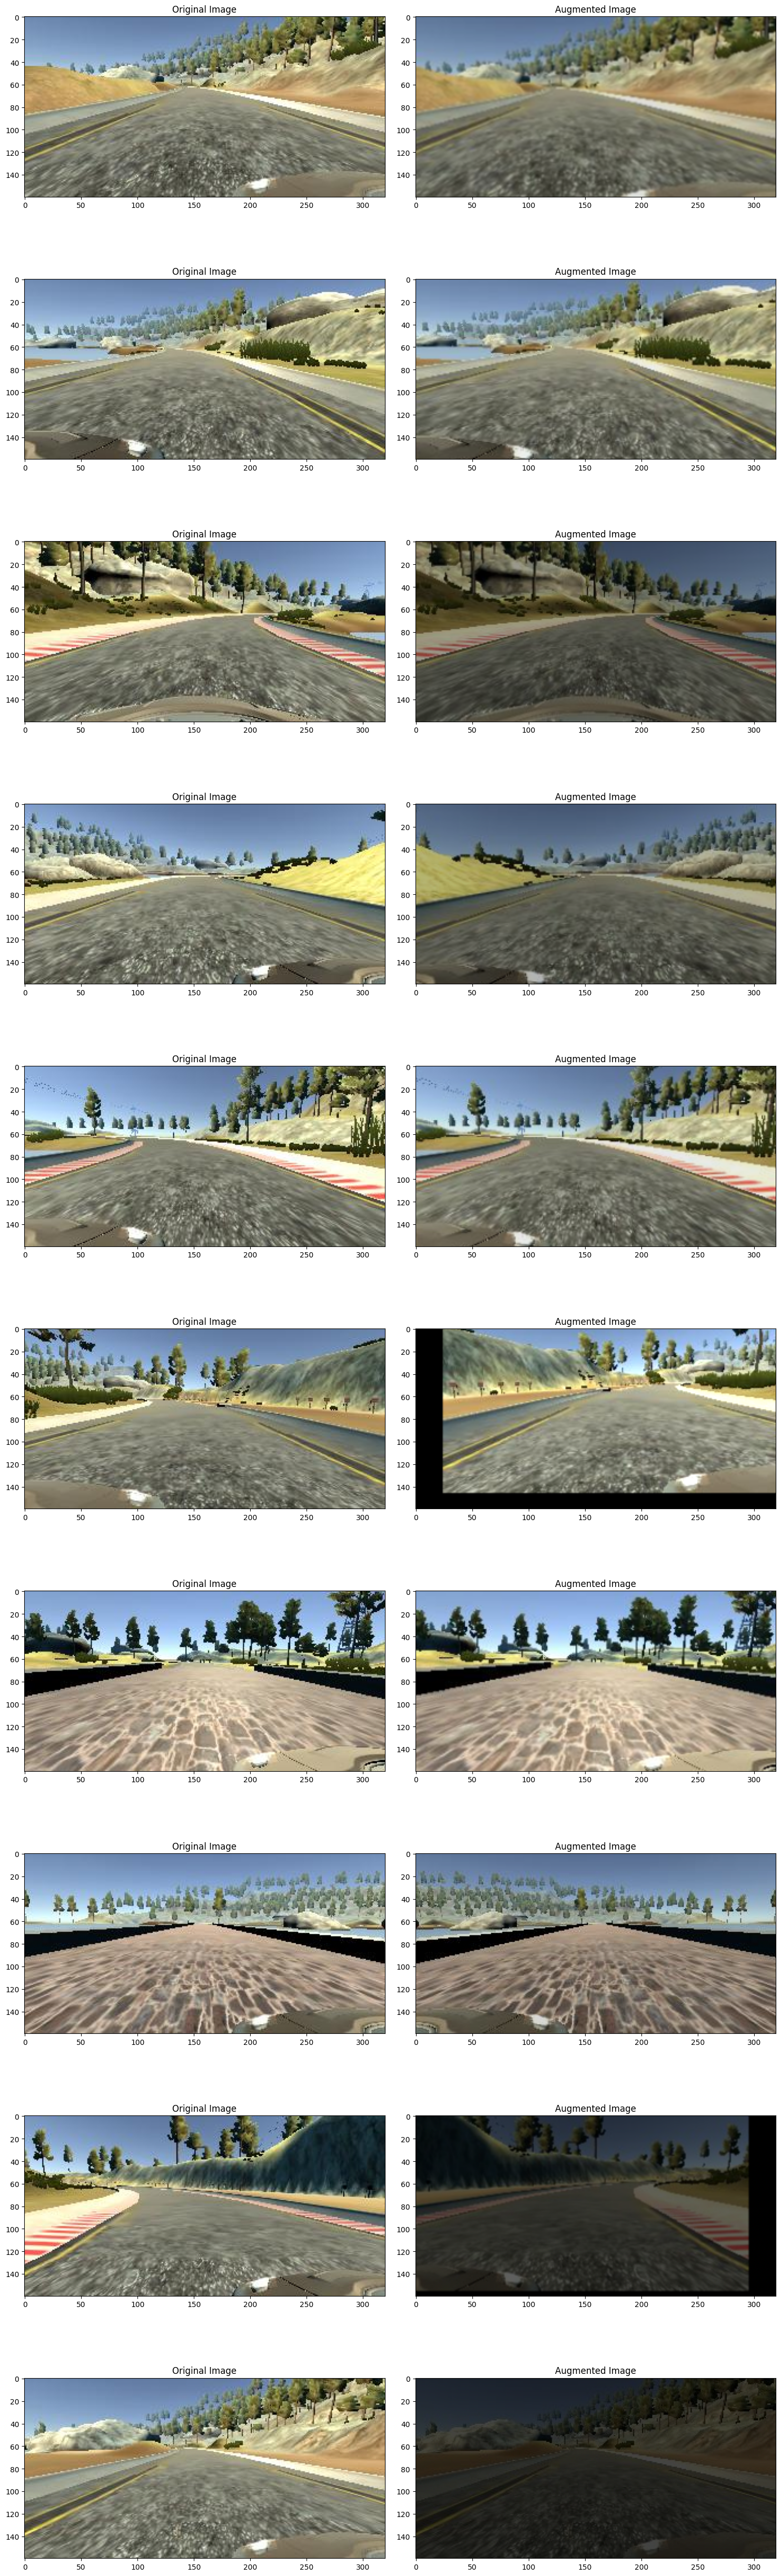

In [23]:

ncol = 2  # Corrected: ncols instead of ncol
nrow = 10

fig, axes = plt.subplots(nrow, ncol, figsize=(15, 50)) # Corrected: fig, axes
fig.tight_layout()

for i in range(10):
    randnum = random.randint(0, len(image_paths) - 1)
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]

    original_image = mpimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)

    axes[i, 0].imshow(original_image)
    axes[i, 0].set_title("Original Image")

    axes[i, 1].imshow(augmented_image)
    axes[i, 1].set_title("Augmented Image")

In [24]:

def img_preprocess(img):
  img = img[60:135,:,:]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3, 3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

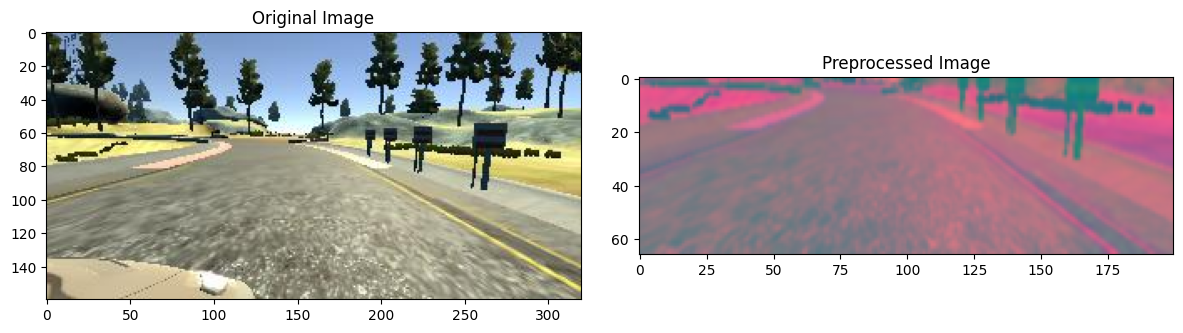

In [25]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

f,axs = plt.subplots(1, 2, figsize=(12, 4))
f.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [26]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:  # Add infinite loop
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            if istraining:
                img, steering = random_augment(image_paths[random_index], steering_ang[random_index])
            else:
                img = mpimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]
            img = img_preprocess(img)
            batch_img.append(img)
            batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))



In [27]:
X_train_gen, Y_train_gen = next(batch_generator(X_train, Y_train, 1, 1))
X_val_gen, Y_val_gen = next(batch_generator(X_val, Y_val, 1, 0))

Text(0.5, 1.0, 'Validation')

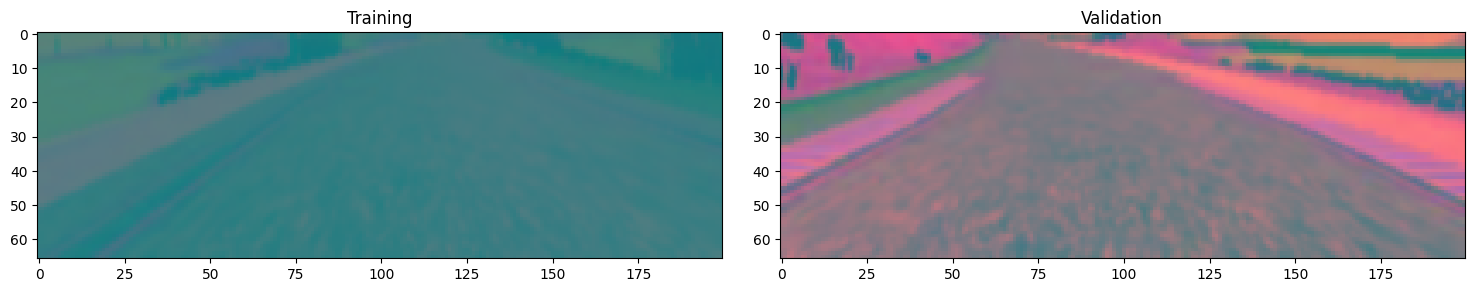

In [28]:
fig, axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(X_train_gen[0])
axs[0].set_title('Training')


axs[1].imshow(X_val_gen[0])
axs[1].set_title('Validation')

We will use nvidia model

In [29]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, (5, 5),strides= (2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, (5, 5),strides= (2, 2), activation='elu'))
  model.add(Conv2D(48, (5, 5), strides = (2, 2), activation='elu'))
  model.add(Conv2D(64,(5,5),activation = "elu"))
  model.add(Flatten())
  model.add(Dense(100,activation="elu"))
  model.add(Dense(50,activation="elu"))
  model.add(Dense(10,activation="elu"))
  model.add(Dense(1))

  optimizer =keras.optimizers.Adam(lr=1e-3)
  model.compile(loss="mse",optimizer=optimizer)

  return model


model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 18, 64)         76864     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               115300    
                                                                 
 dense_1 (Dense)             (None, 50)                5

In [30]:
 history = model.fit(batch_generator(X_train, Y_train, 100,1),
                                 steps_per_epoch=300,
                                 epochs=10,
                                 validation_data=batch_generator(X_val, Y_val, 100, 0),
                                 validation_steps=200,
                                 verbose=1,
                                 shuffle=1)

Epoch 1/10
300/300 [==============================] - 147s 465ms/step - loss: 0.0830 - val_loss: 0.0455
Epoch 2/10
300/300 [==============================] - 133s 443ms/step - loss: 0.0501 - val_loss: 0.0323
Epoch 3/10
300/300 [==============================] - 119s 399ms/step - loss: 0.0389 - val_loss: 0.0282
Epoch 4/10
300/300 [==============================] - 119s 399ms/step - loss: 0.0363 - val_loss: 0.0259
Epoch 5/10
300/300 [==============================] - 120s 401ms/step - loss: 0.0338 - val_loss: 0.0252
Epoch 6/10
300/300 [==============================] - 124s 416ms/step - loss: 0.0345 - val_loss: 0.0263
Epoch 7/10
300/300 [==============================] - 112s 374ms/step - loss: 0.0323 - val_loss: 0.0230
Epoch 8/10
300/300 [==============================] - 154s 513ms/step - loss: 0.0313 - val_loss: 0.0238
Epoch 9/10
300/300 [==============================] - 113s 378ms/step - loss: 0.0300 - val_loss: 0.0236
Epoch 10/10
300/300 [==============================] - 112s 376m

In [35]:
# Save the model
model.save('model.h5')
from google.colab import files
files.download('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Epoch')

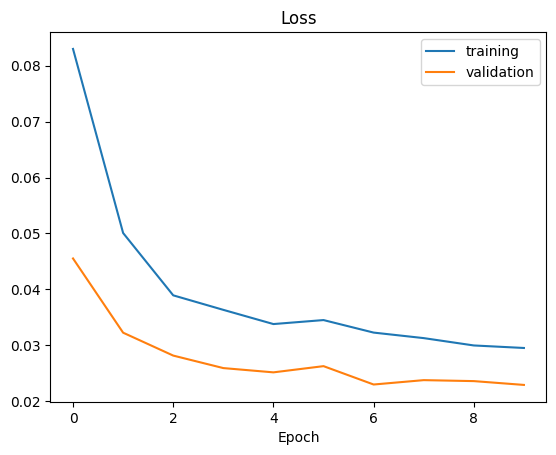

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')